In [1]:
# 首先載入所需套件，一般會利用import (package_name) as (xxx) 來簡化套件名稱，使得之後呼叫它們時更方便

# 操作陣列型態資料處理的套件
import pandas as pd
import numpy as np

# 資料檔案處理
import os # 處理字符串路徑
import zipfile # 內建標準庫提供做壓縮與解壓縮用

# 資料視覺化
import matplotlib.pyplot as plt # 基本的繪圖套件
import matplotlib.image as mpimg # 用於讀取圖片
%matplotlib inline
plt.style.use('ggplot') # 製圖時選用ggplot的視覺樣式

# 指定模型學習的參數
import random
import time
seed = 7
np.random.seed(seed)

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ls

In [ ]:
# 使用wget指令，可從連結中下載檔案至指定位置
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O pics/cats_and_dogs_filtered.zip # 若要指定下載檔案儲存在硬碟中的檔名，可以使用 -O 參數

In [2]:
# 將下載到的資料集解壓縮至資料夾中
local_zip = 'pics/cats_and_dogs_filtered.zip' # 把載下的資料帶入local_zip
zip_ref = zipfile.ZipFile(local_zip, 'r') # 讀取資料夾中的資料
zip_ref.extractall('') # 解壓縮的目的路徑
zip_ref.close() # 關閉資料夾

In [4]:
# 取得資料集路徑
base_dir = 'pics/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') #連結目錄與文件名
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
# 取得所有圖片的路徑
train_cats_dir = os.path.join(train_dir, 'cats')           # 取得訓練用貓圖片的路徑
train_dogs_dir = os.path.join(train_dir, 'dogs')           # 取得訓練用狗圖片的路徑
validation_cats_dir = os.path.join(validation_dir, 'cats') # 取得驗證用貓圖片的路徑
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 取得驗證用狗圖片的路徑

In [6]:
# 取得所有訓練及驗證用的圖片
train_cat_fnames = os.listdir(train_cats_dir)              # 取得訓練用所有貓圖片
train_dog_fnames = os.listdir(train_dogs_dir)              # 取得訓練用所有狗圖片
validation_cat_fnames = os.listdir(validation_cats_dir)    # 取得驗證用所有貓圖片
validation_dog_fnames = os.listdir(validation_dogs_dir)    # 取得驗用所有狗圖片

In [7]:
print(validation_cat_fnames[0])

cat.2042.jpg


In [11]:
import tensorflow as tf
import sys
import matplotlib as mpl
import sklearn

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf


In [17]:
# 函數 API
input = keras.layers.Input(shape=(150, 150, 3))
cov2_layer1 = keras.layers.Conv2D(16,(3,3),strides=(1,1),padding='valid',activation ='relu')(input)
maxpool_layer1 = keras.layers.MaxPool2D(pool_size=(2,2),strides=None)(cov2_layer1)

cov2_layer2 = keras.layers.Conv2D(16,(3,3),strides=(1,1),padding='valid',activation ='relu')(maxpool_layer1)
maxpool_layer2 = keras.layers.MaxPool2D(pool_size=(2,2),strides=None)(cov2_layer2)



flatten = tf.keras.layers.Flatten()(maxpool_layer2)

hidden1 = tf.keras.layers.Dense(30,activation='relu')(flatten)

dropout = tf.keras.layers.Dropout(0.2)(hidden1)

output = tf.keras.layers.Dense(1,activation='sigmoid')(dropout)



model = keras.models.Model(inputs=[input],
                          outputs= [output])

model.summary()
model.compile(loss='mse',optimizer='adam')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                6221

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

print('Adam自動學習速率調速設置！done！')

Adam自動學習速率調速設置！done！


In [20]:
# 以ImageDataGenerator模組，將圖片中每像素的數值介於[0,255] (int整數)
# 正規化(rescale)到 [0,1]之間，即所有資料都乘上1.0/255，以利後續計算
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 為訓練資料
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 為驗證資料

In [21]:
# 使用置數據產生器的flow_from_directory方法，將讀取源文件夾中的圖片，並標註標籤(路徑名稱）輸入到模型(網路)中
train_generator = train_datagen.flow_from_directory(
        train_dir,  # 圖片訓練集來源
        target_size=(150, 150),  # 指定圖片尺寸縮小至150x150
        batch_size=20, # 批量大小一次讀取20張圖片
        class_mode='binary') # 分類方式為二進制(非0即1)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # 圖片驗證集來源
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print('resize！done!')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
resize！done!


In [23]:
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2,
      callbacks = callbacks,
      shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 12s - loss: 0.1373 - acc: 0.9480 - val_loss: 0.8025 - val_acc: 0.7030
Epoch 2/15
100/100 - 11s - loss: 0.0919 - acc: 0.9700 - val_loss: 1.0132 - val_acc: 0.6960
Epoch 3/15
100/100 - 12s - loss: 0.0767 - acc: 0.9765 - val_loss: 1.0299 - val_acc: 0.7070
Epoch 4/15
100/100 - 12s - loss: 0.0594 - acc: 0.9825 - val_loss: 1.1167 - val_acc: 0.7020
Epoch 5/15
100/100 - 13s - loss: 0.0498 - acc: 0.9865 - val_loss: 1.2760 - val_acc: 0.6900
Epoch 6/15
100/100 - 13s - loss: 0.0526 - acc: 0.9825 - val_loss: 1.1032 - val_acc: 0.7090


In [28]:
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


Result = 0.998555
Test time :0.024221 second.
有 99.86% 機率為資料集2


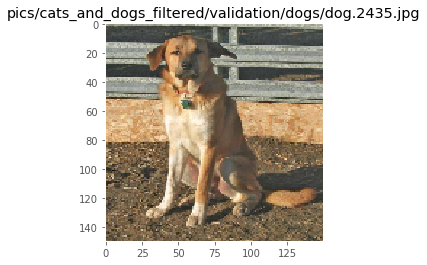

In [39]:
# 隨機從img_files_1或img_files_2路徑挑選一個
validation = 'pics/cats_and_dogs_filtered/validation'

img_files_1 = [os.path.join(validation_cats_dir, f) for f in validation_cat_fnames]
img_files_2 = [os.path.join(validation_dogs_dir, f) for f in validation_dog_fnames]
img_path = random.choice(img_files_1 + img_files_2)

# 讀入待測試圖像並秀出
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
plt.title(img_path)
plt.grid(False)
plt.imshow(img)

# 將圖像轉成模型可分析格式(150x150x3, float32)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255 # Rescale by 1/255

start = time.time() # 啟動計時器
result = model.predict(x) # 對輸入圖像進行推論(預測)
finish = time.time() # 結束計時器

print ("Result = %f" %result) # 印出結果可能機率值(0.0 ~ 1.0)
print("Test time :%f second." %(finish-start)) # 印出推論時間

# 設定分類門檻值並印出推論結果
print("有 %.2f%% 機率為資料集2" %(result * 100)) # 印出推論時間